# Least Squares

In this notebook you'll use least squares to estimate a state vector $x$, given $m$ noisy measurements derived from:

$
\tilde{y} = Hx + v
$

$v$ is sampled from gaussian $N(0, R)$, and $H$ is a matrix mapping the state space to the measurement space. We'll assume x is constant, meaning the vehicle is currently not moving.

Thus you'll want to select an estimate of the state $x$, $\hat{x}$ which maximizes the likelihood of the observed measurements $\tilde{y}$:

$
p(y = \tilde{y} | x = \hat{x})
$

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

%matplotlib inline

### Setup

In [16]:
# number of samples
# the larger this value the more
# accurate the x hat will be.
n_samples = 1000

# size of state
n = 4

In [17]:
def make_H(m, degree, t):
    """
    Creates a matrix where
    each row is of the form:
    
        [t**degree, t**(degree-1), ..., 1]
    """
    H = np.zeros((m, degree))
    for i in np.arange(degree-1, -1, -1):
        H[:, -i-1] = t**i
    return H

In [18]:
# known constants
t = np.random.uniform(-5, 5, n_samples)
H = make_H(n_samples, n, t)

# state, unknown in practice
x = np.random.randn(n) * 2

### Collecting Observations

First you'll have to collect $m$ noisy observations, these will be used later to estimate $x$.

**NOTE: You may have not encountered the `@` syntax. In a nutshell, `np.dot(H, x)` is equivalent to `H @ x`. If the equation contains multiple matrix multiplications, using `@` provides a much more comprehensible expression. **

In [19]:
# TODO: collect m noisy observations, the noise distribution should be gaussian
y_obs = ?

Text(0.5, 1.0, 'Noisy Observations')

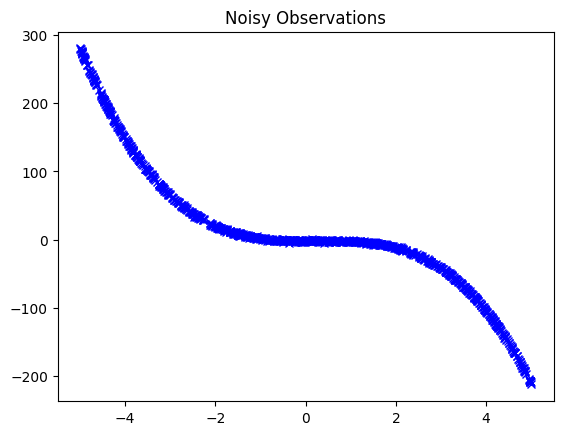

In [20]:
plt.plot(t, y_obs, 'bx')
plt.title("Noisy Observations")

The observations plot produces a polynomial of order `len(x) - 1`, i.e. a 4-element state produces a 3rd order polynomial. In this case the state $x$ are the coefficients of the polynomial. By generating observation from evaluating the polynomial at several different points we can gain a good approximation of the original state.

As one might imagine, recovering a good approximation of the state requires more samples as the order of the polynomial increases.

### Estimating $x$ 

Given enough samples $\hat{x}$ should converge to $x$. The exact number of measurements required depends on the complexity of mapping the state space to the measurement space, $H$ and how noisy the measurements are, determined by $v$.

Recall from lecture:

$
\hat{x} = (H^T H)^{-1} H^T \tilde{y}
$

$\hat{x}$ should be similar to $x$.

In [21]:
## TODO: calculate x_hat
x_hat = LA.pinv(H.T @ H) @ H.T @ y_obs

In [22]:
print(x_hat)
print(x)

[-1.96970439  1.47782277 -0.07372813 -1.80555664]
[-1.96764568  1.47738528 -0.10791524 -1.87370881]


[Solution](./Least-Squares-Solution.ipynb)